In [4]:
import rdkit
print(rdkit.__version__)

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import rdCoordGen
from rdkit.Chem import rdAbbreviations

from rdkit.Chem.Draw import IPythonConsole

from PIL import Image
import io

2024.03.3


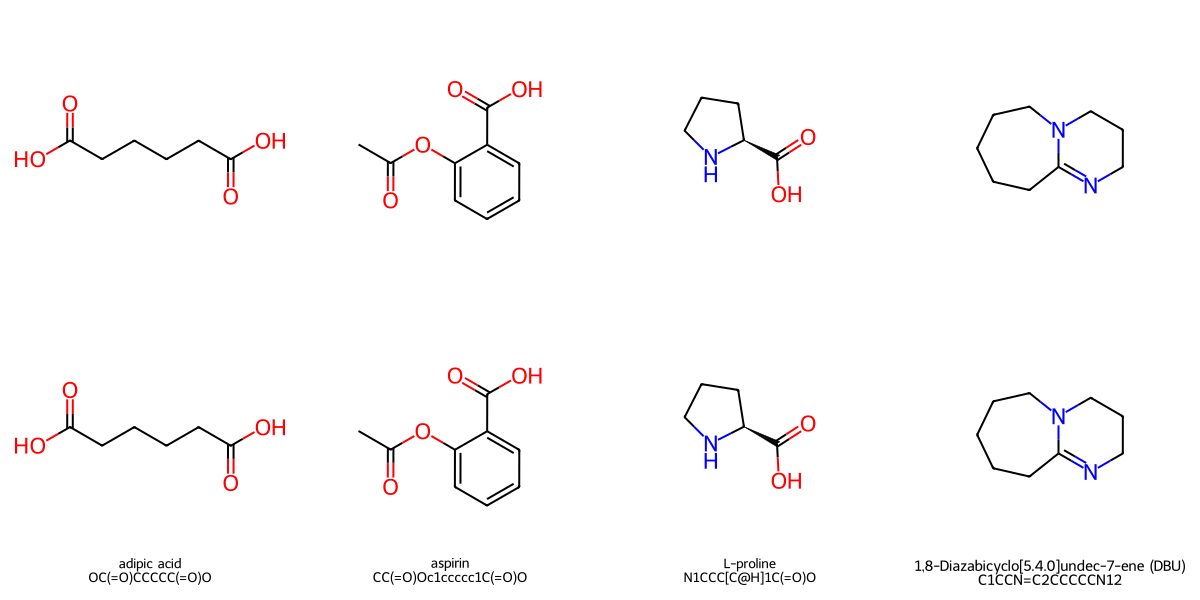

In [3]:
smiles_dict = {
    "adipic acid": "OC(=O)CCCCC(=O)O",
    "aspirin": "CC(=O)Oc1ccccc1C(=O)O",
    "L-proline": "N1CCC[C@H]1C(=O)O",
    "1,8-Diazabicyclo[5.4.0]undec-7-ene (DBU)":"C1CCN=C2CCCCCN12",
}

mols_to_draw = []
legends_list = []

for name in smiles_dict.keys():
    smi = smiles_dict[name]
    mol = Chem.MolFromSmiles(smi)
    rdCoordGen.AddCoords(mol)
    mols_to_draw.append(mol)
    legends_list.append(name+"\n"+smi)

mols_matrix = [mols_to_draw, mols_to_draw]
x = ["",] * 4
legends_matrix = [x, legends_list]

img = Draw.MolsMatrixToGridImage(mols_matrix, subImgSize=(300,300), useSVG=False, legendsMatrix=legends_matrix)
img


[16:19:19] Molecule does not have explicit Hs. Consider calling AddHs()
[16:19:19] Molecule does not have explicit Hs. Consider calling AddHs()


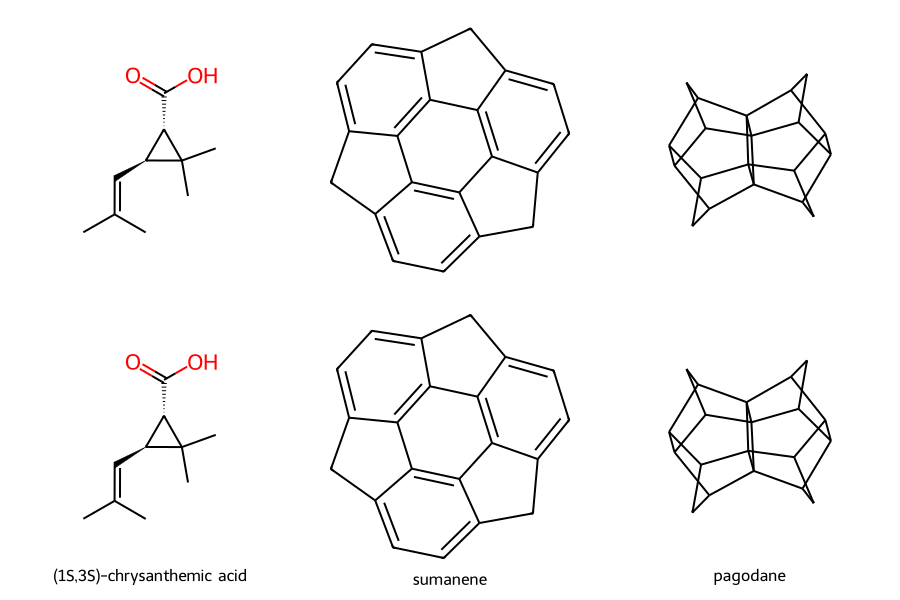

In [4]:
challenge_smiles_dict = {
    "(1S,3S)-chrysanthemic acid": "CC(C)=C[C@@H]1C(C)(C)[C@H]1C(=O)O",
    "sumanene": "C16=C5C4=C3C2=C1C7=CC=C2CC3=CC=C4CC5=CC=C6C7",
    "pagodane": "C1C2C3C4CC5C3C1C13C6CC7C8C9CC(C68)C51C49C237",
    }

mols_to_draw = []
legends_list = []

for name in challenge_smiles_dict.keys():
    smi = challenge_smiles_dict[name]
    mol = Chem.MolFromSmiles(smi)
    rdCoordGen.AddCoords(mol)
    if name == 'pagodane' or name == 'sumanene':
        AllChem.EmbedMolecule(mol, randomSeed=42)
    mols_to_draw.append(mol)
    legends_list.append(name)

mols_matrix = [mols_to_draw, mols_to_draw]
x = ["",] * 3
legends_matrix = [x, legends_list]

img = Draw.MolsMatrixToGridImage(mols_matrix, subImgSize=(300,300), returnPNG=True, useSVG=False, legendsMatrix=legends_matrix)
img


In [5]:
import io
from PIL import Image, ImageDraw, ImageFont

def draw_reaction(smiles):
    rxn = AllChem.ReactionFromSmarts(smiles, useSmiles=True)
    d2d = Draw.MolDraw2DCairo(800, 200)
    d2d.DrawReaction(rxn)
    png = d2d.GetDrawingText()
    return png

def add_legend(image, text, font, text_height):
    # Create a new image with space for the text legend
    img_with_legend = Image.new('RGB', (image.width, image.height + text_height), (255, 255, 255))
    img_with_legend.paste(image, (0, 0))

    if len(text) > 80:
        separated_text = text.split(">")
        text = separated_text[0] + "\n >" + separated_text[1] + ">\n" + separated_text[2]
    
    # Draw the text legend
    draw = ImageDraw.Draw(img_with_legend)
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_position = ((image.width - text_width) // 2, image.height + (text_height // 4))
    draw.text(text_position, text, fill=(0, 0, 0), font=font)
    
    return img_with_legend

def create_combined_image(smiles_list, output_path, save=True, text_height=80):
    # List to store the individual reaction images with legends
    images = []
    
    # Load the Times New Roman font with size 24
    font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'  # Update this path if necessary
    font_size = 15
    font = ImageFont.truetype(font_path, font_size)
    
    # Height for the text legend
    text_height = 80
    
    # Generate reaction images with legends for each SMILES string
    for smiles in smiles_list:
        png_data = draw_reaction(smiles)
        img = Image.open(io.BytesIO(png_data))
        img_with_legend = add_legend(img, smiles, font, text_height)
        images.append(img_with_legend)
    
    # Calculate the total height and maximum width for the combined image
    total_height = sum(img.height for img in images)
    max_width = max(img.width for img in images)
    
    # Create a new blank image with the calculated dimensions
    combined_image = Image.new('RGB', (max_width, total_height), (255, 255, 255))
    
    # Paste each reaction image with legend one under another
    current_y = 0
    for img in images:
        combined_image.paste(img, (0, current_y))
        current_y += img.height
    
    if save == True:
        # Save the final combined image
        combined_image.save(output_path)
    else: pass

    return combined_image

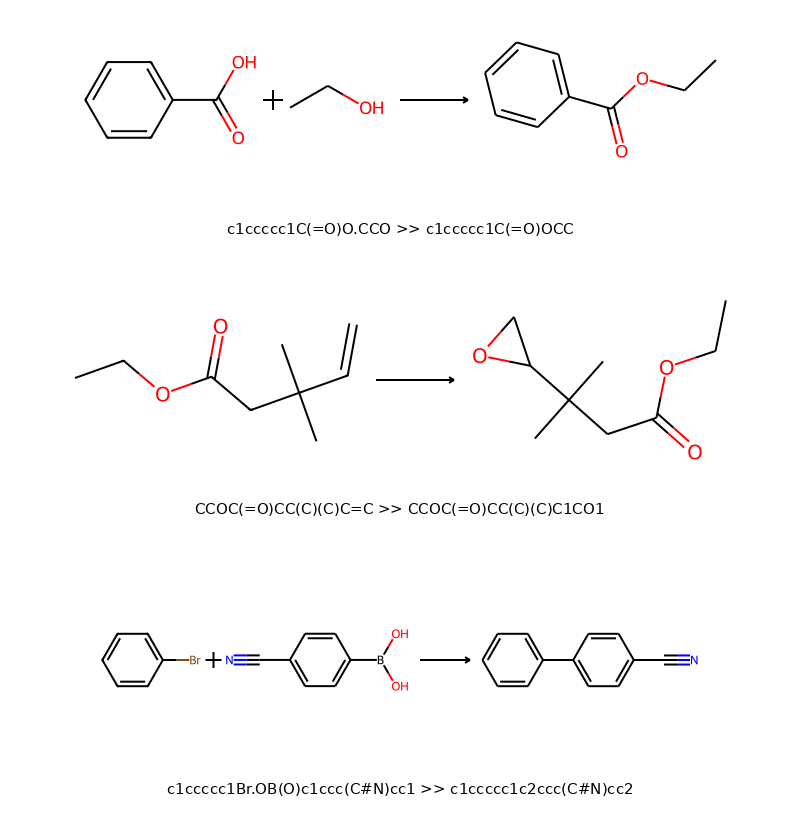

In [6]:
rxn_smiles_list_1 = [
    "c1ccccc1C(=O)O.CCO >> c1ccccc1C(=O)OCC",
    "CCOC(=O)CC(C)(C)C=C >> CCOC(=O)CC(C)(C)C1CO1",
    "c1ccccc1Br.OB(O)c1ccc(C#N)cc1 >> c1ccccc1c2ccc(C#N)cc2",
]

output_path = '/home/galymzhan/Pictures/pop_sci_articles/chrysanthemic_acid_synthesis.png'
create_combined_image(rxn_smiles_list_1, output_path, save=False,text_height=20)




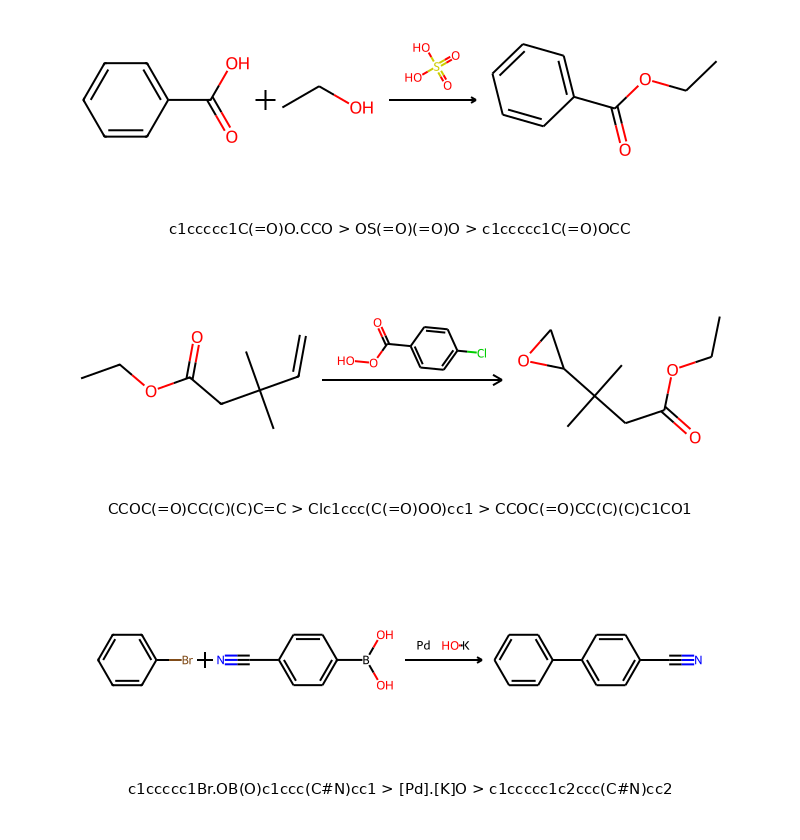

In [7]:
rxn_smiles_list_2 = [
    "c1ccccc1C(=O)O.CCO > OS(=O)(=O)O > c1ccccc1C(=O)OCC",
    "CCOC(=O)CC(C)(C)C=C > Clc1ccc(C(=O)OO)cc1 > CCOC(=O)CC(C)(C)C1CO1",
    "c1ccccc1Br.OB(O)c1ccc(C#N)cc1 > [Pd].[K]O > c1ccccc1c2ccc(C#N)cc2",
]

output_path = '/home/galymzhan/Pictures/pop_sci_articles/chrysanthemic_acid_synthesis.png'
create_combined_image(rxn_smiles_list_2, output_path, save=False,text_height=20)

In [8]:
# #################################
# ### Chrysanthemic acid synthesis
# ### Respa 2024 / Problem no. 8
# #################################

rxn_smiles_list = [
    "CC(C)=CCO.CC(OCC)(OCC)OCC > [H+] > CCOC(=O)CC(C)(C)C=C",
    "CCOC(=O)CC(C)(C)C=C > Clc1ccc(C(=O)OO)cc1 > CCOC(=O)CC(C)(C)C1CO1",
    "CCOC(=O)CC(C)(C)C1CO1 > [Li]N(C(C)C)C(C)C.O=P(N(C)C)(N(C)C)N(C)C > CCOC(=O)[C@@H]1C(C)(C)[C@H]1CO",
    "CCOC(=O)[C@@H]1C(C)(C)[C@H]1CO > c12ccccc1C(=O)OI2(OC(=O)C)(OC(=O)C)OC(=O)C > CCOC(=O)[C@@H]1C(C)(C)[C@H]1C=O",
    "CCOC(=O)[C@@H]1C(C)(C)[C@H]1C=O.CC(C)C=[P](c1ccccc1)(c1ccccc1)c1ccccc1 > > CCOC(=O)[C@@H]1C(C)(C)[C@H]1C=C(C)C",
    "CCOC(=O)[C@@H]1C(C)(C)[C@H]1C=C(C)C > [H+] > OC(=O)[C@@H]1C(C)(C)[C@H]1C=C(C)C",
]

# i = 4

# rxn_smiles = rxn_smiles_list[i]
# print(rxn_smiles)
# rxn = AllChem.ReactionFromSmarts(rxn_smiles, useSmiles=True)
# img = Draw.ReactionToImage(rxn, subImgSize=(300,300), returnPNG=False)
# img

In [5]:
# Example usage
output_path = '/home/galymzhan/Pictures/pop_sci_articles/chrysanthemic_acid_synthesis.png'
create_combined_image(rxn_smiles_list, output_path, save=True)

NameError: name 'create_combined_image' is not defined

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [9]:
# List of example SMILES strings representing organic molecules
smiles_list = {
    "Cyclohexane": "C1CCCCC1",
    "Ethanol": "CCO",
    "Diethyl ether": "CCOCC",
    "Acetic acid": "CC(=O)O",
    "L-Proline": "C1C[C@H](NC1)C(=O)O",
    "Hexanone": "C1(=O)CCCCC1",
    "Octanone": "C1(=O)CCCCCCC1",
    "Sumanene": "C16=C5C4=C3C2=C1C7=CC=C2CC3=CC=C4CC5=CC=C6C7",
    "Progesterone": "CC(=O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=CC(=O)CC[C@]34C)C",
    "Morphine": "CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5",
    "Strychnine": "O=C7N2c1ccccc1[C@@]64[C@@H]2[C@@H]3[C@@H](OC/C=C5\[C@@H]3C[C@@H]6N(CC4)C5)C7",
    "Taxol": "CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C",
}



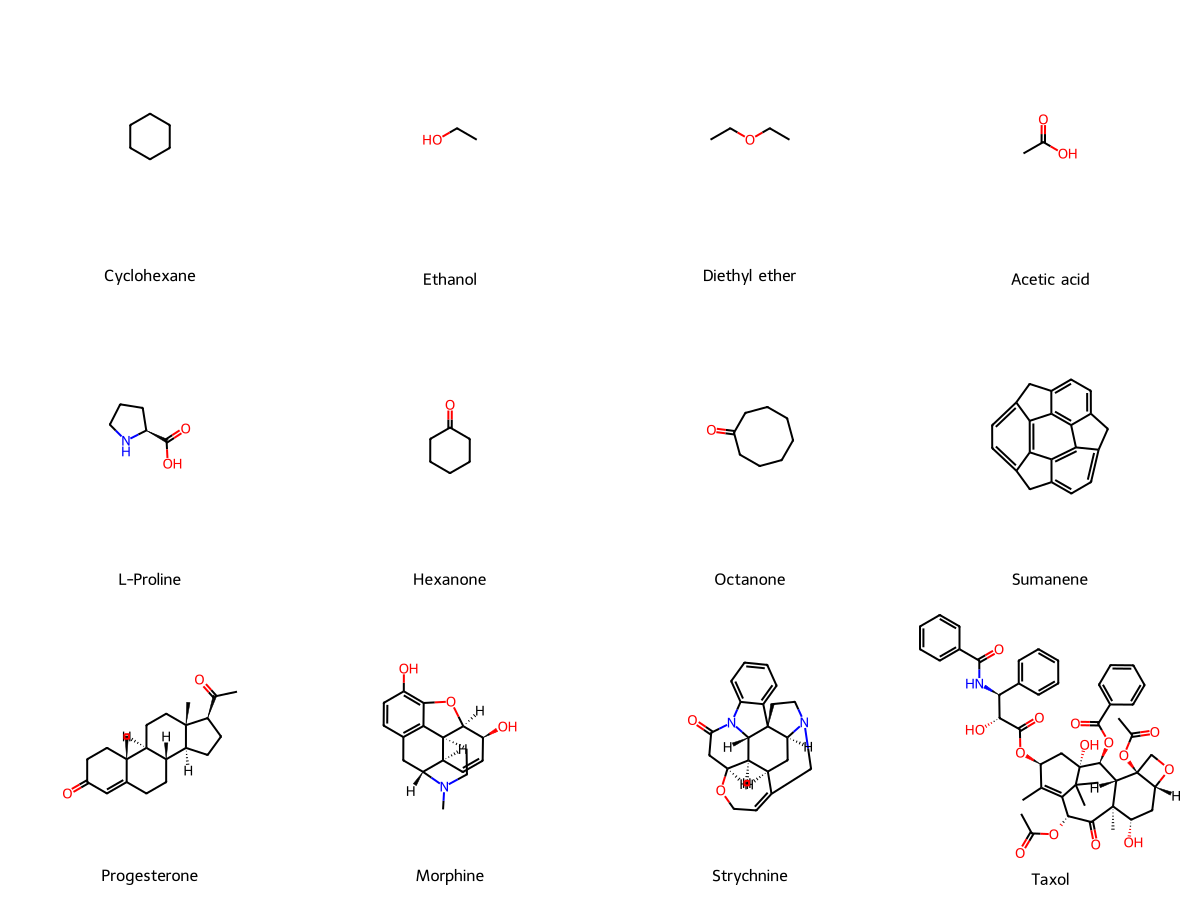

In [13]:
def draw_smiles_grid(smiles_list, legends, mols_per_row=5):
    """
    Draws a grid of molecules from SMILES strings.
    
    Parameters:
    - smiles_list: List of SMILES strings to draw.
    - mols_per_row: Number of molecules per row (default is 5).
    
    Returns:
    - plt.Figure: Matplotlib figure containing the grid of molecule images.
    """
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if Chem.MolFromSmiles(smiles) is not None]
    for i, mol in enumerate(mols):
        rdCoordGen.AddCoords(mol)
        
    if len(mols) == 0:
        print("No valid molecules found!")
        return
    
    img = Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, subImgSize=(300, 300), legends=legends)
    return img

img = draw_smiles_grid(list(smiles_list.values()), list(smiles_list.keys()), mols_per_row=4)
img

In [11]:
# Calculate Morgan fingerprints with est radius and size
mfpgen = Chem.rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=128,)
fingerprints = []
for name in smiles_list.keys():
    smiles = smiles_list[name]
    mol = Chem.MolFromSmiles(smiles)
    fp = mfpgen.GetFingerprint(mol,)
    entry = (name, np.array(list(fp.ToBitString()), dtype=int))
    fingerprints.append(entry)

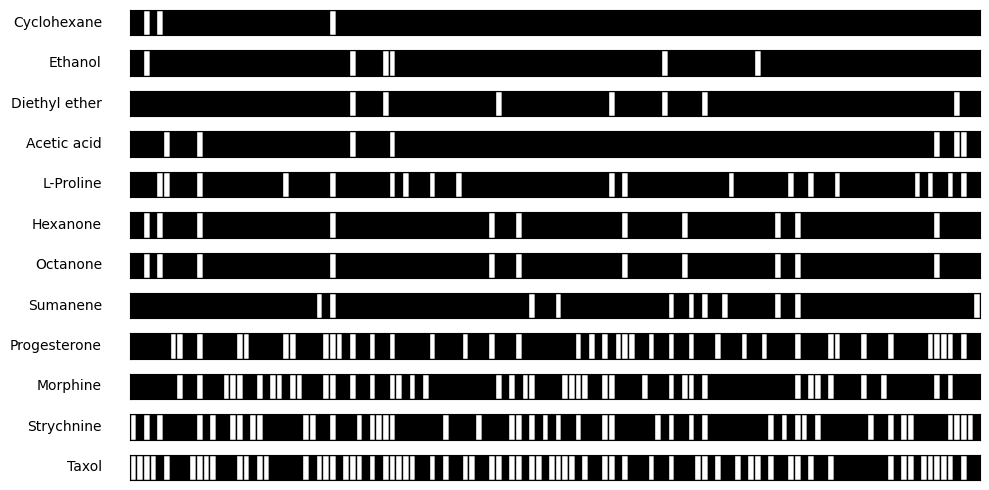

In [12]:
setting = 1

# Visualize the fingerprints as black and white boxes
fig, axes = plt.subplots(len(fingerprints), 1, figsize=(10, 5))
for i, fp in enumerate(fingerprints):
    if setting == 0:
        axes[i].imshow(fp[1].reshape(1, -1), cmap="gray", aspect="auto")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        
    elif setting == 1:
        axes[i].set_xlim(0, len(fp[1]))
        axes[i].set_ylim(0, 1)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        
        for j, bit in enumerate(fp[1]):
            rect = patches.Rectangle((j, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='white' if bit else 'black')
            axes[i].add_patch(rect)

    axes[i].set_ylabel(f"{fp[0]}", rotation=0, labelpad=20, va='center', ha='right',)
plt.tight_layout()
plt.show()
